[89.43941911901771, 89.43941911901771, 181.16281642579347, 695.9623489210621]
[89.43941911901771, 181.16281642579347, 695.9623489210621]


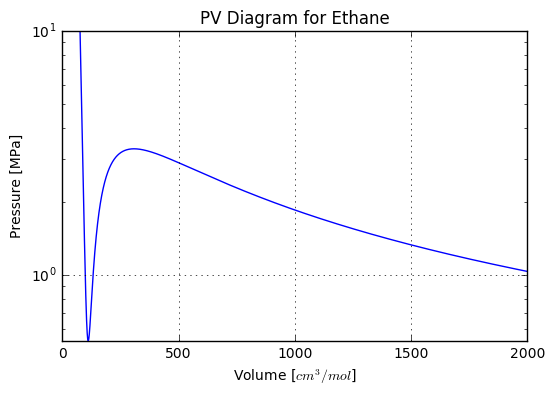

In [98]:
%matplotlib inline
import math as mm
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import newton

### Soave Redlich-Kwong equation of state
#
#   P = (RT)/(V-b) - a/(V(V+b))
#
#   a = 0.42748*((R*Tc)^2/Pc)*(1+m*(1-sqrt(Tr))**2
#   b = 0.08664*((R*Tc)/Pc)
#   
#   Tr = T/Tc
#   m = 0.480 + 1.574*w - 0.176*w**2  
#

# declare variables
P = 2.39138     # MPa
R = 8.314472    # gas constant (cm^3*MPa/mol*K)
T = 278         # temperature (K)

# Ethane's critical parameters
Tc = 305.4    # critical temp (K)
Pc = 4.88     # critical pressure (MPa)
w = 0.099     # acentric factor

Tr = T/Tc     # reduced temperature

# Define functions
m = 0.480 + 1.574*w - 0.176*(w**2)
a = 0.42748*(((R*Tc)**2)/Pc)*(1+m*(1-mm.sqrt(Tr)))**2    
b = 0.08664*((R*Tc)/Pc)

# function to find roots
def srk(Vm):
    return ((R*T)/(Vm-b) - a/(Vm*(Vm+b)) - P)

# function to find P and plot
def srkP(Vm):
    return (R*T)/(Vm-b) - a/(Vm*(Vm+b))

i = 2
lastVal = srk(i)
cont = True
roots = []

while(cont):
    if (lastVal/srk(i) < 0):
        roots.append(newton(srk,i))
    elif(i>100000):
        cont = False
    lastVal = srk(i)
    i = i + 5
    
print(roots)

if len(roots)>3:
    roots = roots[1:4]
    
print(roots)

# simulation
V = np.linspace(2,2000,200000)
P = []
P = (srkP(V))


#visualization
plt.semilogy(V,P)

plt.xlabel('Volume [$cm^3/mol$]')
plt.ylabel('Pressure [MPa]')
plt.title('PV Diagram for Ethane')
plt.grid()
plt.ylim([-10,10]);

    
    


In [127]:
from ipywidgets import interact

def LynxHare(T=273):
    a = 1
    print(T)
    
    def test(X):   
        T = X
        #print(T)
        return 

#print(T)

In [130]:
interact(LynxHare, T = (270,290,1))


273


<function __main__.LynxHare>